In [91]:
import pandas as pd
import numpy as np

# Leer la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

# Eliminar valores duplicados
airbnb_data.drop_duplicates(inplace=True)

# Eliminar columnas sin información relevante
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

# Imputación de valores faltantes con la media
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# Identificar y tratar outliers
# Calcular cuartiles
Q1 = airbnb_data.quantile(0.25, numeric_only=True)
Q3 = airbnb_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outlier_threshold = 1.5
outlier_mask = (airbnb_data.select_dtypes(include=np.number) < (Q1 - outlier_threshold * IQR)) | (airbnb_data.select_dtypes(include=np.number) > (Q3 + outlier_threshold * IQR))

airbnb_data[outlier_mask] = np.nan

# Transformar variables categóricas a numéricas utilizando one-hot encoding
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# Calcular la cantidad de oferentes por "Neighbourhood group"
offer_group = airbnb_data[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']].sum(axis=1)

# Agregar la columna 'offer_group' al DataFrame
airbnb_data['offer_group'] = offer_group

print(airbnb_data.head())


                                               name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237  149.0             1.0   
1       Midtown  40.75362  -73.98377  225.0             1.0   
2        Harlem  40.80902  -73.94190  150.0             3.0   
3  Clinton Hill  40.68514  -73.95976   89.0             1.0   
4   East Harlem  40.79851  -73.94399   80.0            10.0   

   number_of_reviews last_review  neighbourhood_group_Bronx  \
0                9.0  2018-10-19                      False   
1               45.0  2019-05-21                      False   
2                0.0   

In [19]:
# Seleccionar las columnas deseadas, incluidas las columnas transformadas por one-hot encoding
selected_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
airbnb_data_selected = airbnb_data[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = airbnb_data_selected.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                                   latitude  longitude     price  \
latitude                           1.000000   0.083898  0.077664   
longitude                          0.083898   1.000000 -0.394719   
price                              0.077664  -0.394719  1.000000   
minimum_nights                    -0.010686  -0.053522  0.059843   
number_of_reviews                 -0.027373   0.058765 -0.034383   
neighbourhood_group_Bronx          0.276732   0.222263 -0.096394   
neighbourhood_group_Brooklyn      -0.686899   0.206733 -0.179146   
neighbourhood_group_Manhattan      0.618465  -0.506588  0.327417   
neighbourhood_group_Queens         0.022240   0.458197 -0.169180   
neighbourhood_group_Staten Island -0.160960        NaN -0.040387   
room_type_Entire home/apt          0.000089  -0.242648  0.619572   
room_type_Private room            -0.002045   0.234134 -0.575924   
room_type_Shared room              0.006425   0.031166 -0.141970   

                                   minimum_nigh

In [19]:
# Seleccionar las columnas deseadas, incluidas las columnas transformadas por one-hot encoding
selected_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
airbnb_data_selected = airbnb_data[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = airbnb_data_selected.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                                   latitude  longitude     price  \
latitude                           1.000000   0.083898  0.077664   
longitude                          0.083898   1.000000 -0.394719   
price                              0.077664  -0.394719  1.000000   
minimum_nights                    -0.010686  -0.053522  0.059843   
number_of_reviews                 -0.027373   0.058765 -0.034383   
neighbourhood_group_Bronx          0.276732   0.222263 -0.096394   
neighbourhood_group_Brooklyn      -0.686899   0.206733 -0.179146   
neighbourhood_group_Manhattan      0.618465  -0.506588  0.327417   
neighbourhood_group_Queens         0.022240   0.458197 -0.169180   
neighbourhood_group_Staten Island -0.160960        NaN -0.040387   
room_type_Entire home/apt          0.000089  -0.242648  0.619572   
room_type_Private room            -0.002045   0.234134 -0.575924   
room_type_Shared room              0.006425   0.031166 -0.141970   

                                   minimum_nigh

In [19]:
# Seleccionar las columnas deseadas, incluidas las columnas transformadas por one-hot encoding
selected_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
airbnb_data_selected = airbnb_data[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = airbnb_data_selected.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                                   latitude  longitude     price  \
latitude                           1.000000   0.083898  0.077664   
longitude                          0.083898   1.000000 -0.394719   
price                              0.077664  -0.394719  1.000000   
minimum_nights                    -0.010686  -0.053522  0.059843   
number_of_reviews                 -0.027373   0.058765 -0.034383   
neighbourhood_group_Bronx          0.276732   0.222263 -0.096394   
neighbourhood_group_Brooklyn      -0.686899   0.206733 -0.179146   
neighbourhood_group_Manhattan      0.618465  -0.506588  0.327417   
neighbourhood_group_Queens         0.022240   0.458197 -0.169180   
neighbourhood_group_Staten Island -0.160960        NaN -0.040387   
room_type_Entire home/apt          0.000089  -0.242648  0.619572   
room_type_Private room            -0.002045   0.234134 -0.575924   
room_type_Shared room              0.006425   0.031166 -0.141970   

                                   minimum_nigh

In [13]:
import pandas as pd
import numpy as np

# Leer la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

# Eliminar valores duplicados
airbnb_data.drop_duplicates(inplace=True)

# Eliminar columnas sin información relevante
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

# Imputación de valores faltantes con la media
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# Identificar y tratar outliers
# Calcular cuartiles
Q1 = airbnb_data.quantile(0.25, numeric_only=True)
Q3 = airbnb_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outlier_threshold = 1.5
outlier_mask = (airbnb_data.select_dtypes(include=np.number) < (Q1 - outlier_threshold * IQR)) | (airbnb_data.select_dtypes(include=np.number) > (Q3 + outlier_threshold * IQR))

airbnb_data[outlier_mask] = np.nan

# Transformar variables categóricas a numéricas utilizando one-hot encoding
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# Calcular la cantidad de oferentes por "Neighbourhood group"
offer_group = airbnb_data[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']].sum(axis=1)

# Agregar la columna 'offer_group' al DataFrame
airbnb_data['offer_group'] = offer_group

print(airbnb_data.head())


                                               name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237  149.0             1.0   
1       Midtown  40.75362  -73.98377  225.0             1.0   
2        Harlem  40.80902  -73.94190  150.0             3.0   
3  Clinton Hill  40.68514  -73.95976   89.0             1.0   
4   East Harlem  40.79851  -73.94399   80.0            10.0   

   number_of_reviews last_review  neighbourhood_group_Bronx  \
0                9.0  2018-10-19                      False   
1               45.0  2019-05-21                      False   
2                0.0   

In [20]:
import sys
!{sys.executable} -m pip install seaborn

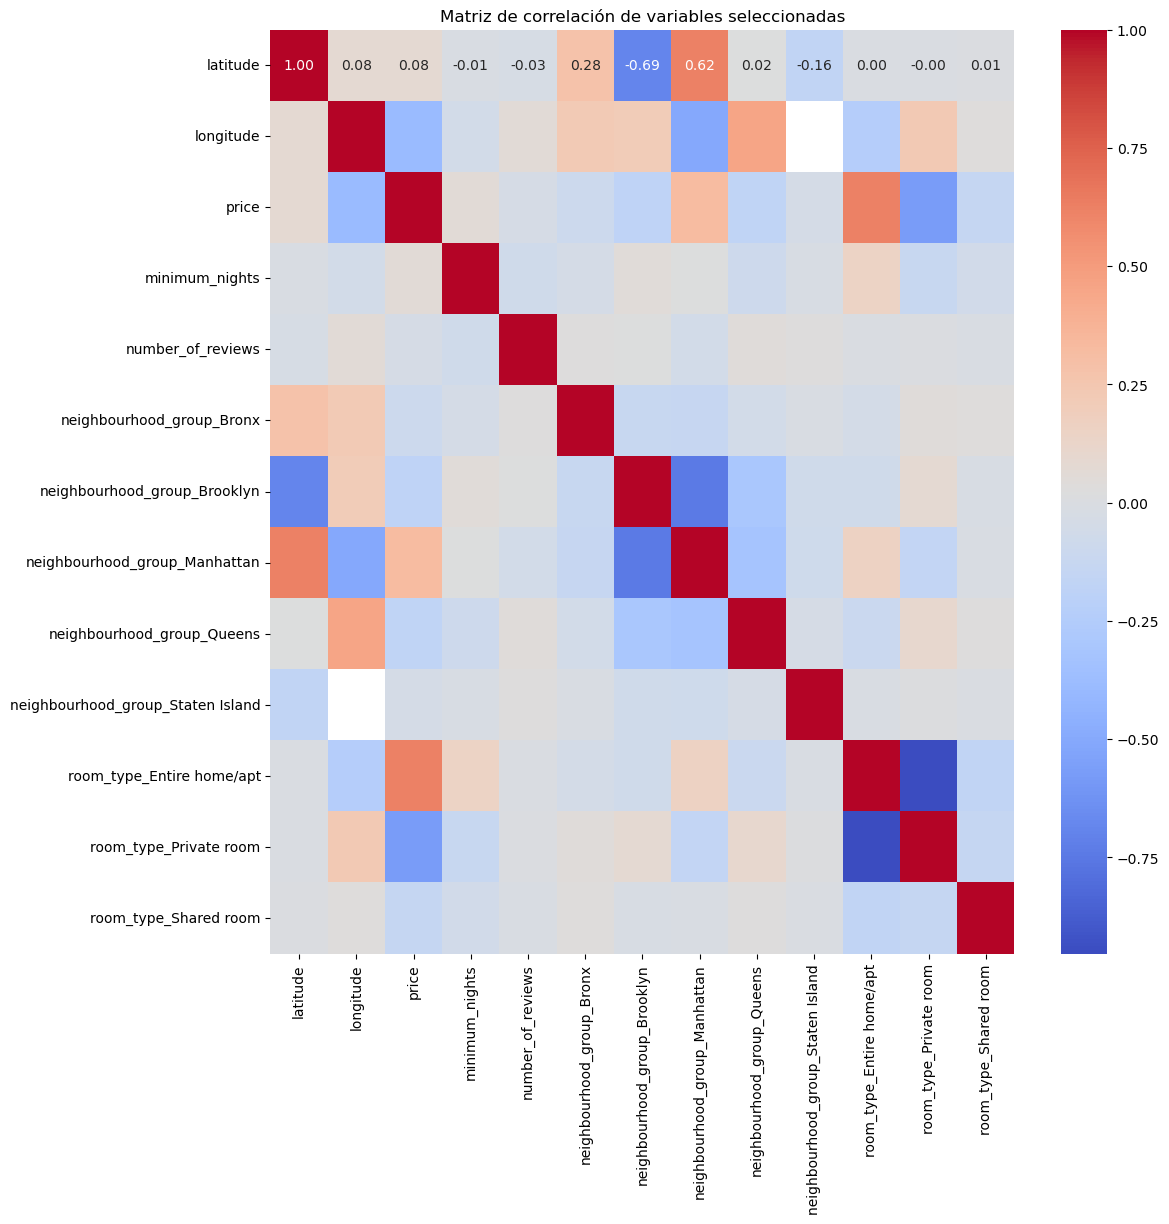

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()


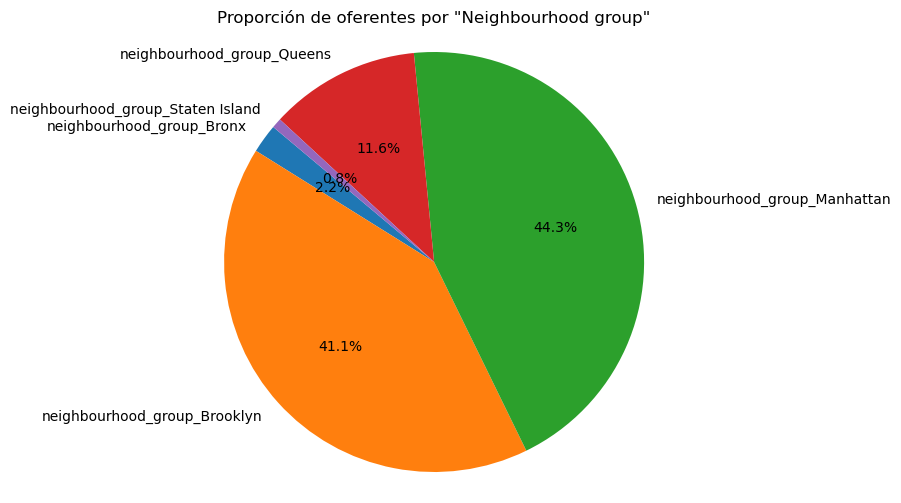

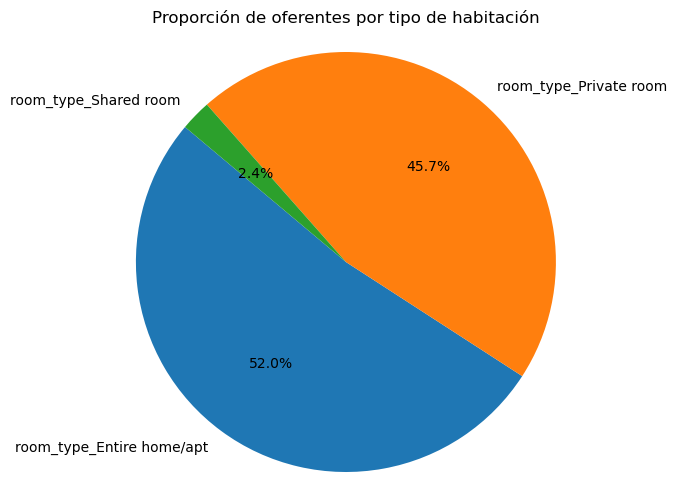

In [23]:
import matplotlib.pyplot as plt

# Calcular la proporción de oferentes por "Neighbourhood group" utilizando las columnas one-hot
neighbourhood_group_columns = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']
neighbourhood_group_counts = airbnb_data[neighbourhood_group_columns].sum()
neighbourhood_group_proportions = neighbourhood_group_counts / len(airbnb_data)

# Crear gráfico de pastel para mostrar la composición por "Neighbourhood group"
plt.figure(figsize=(8, 6))
plt.pie(neighbourhood_group_proportions, labels=neighbourhood_group_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de oferentes por "Neighbourhood group"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calcular la proporción de oferentes por tipo de habitación utilizando las columnas one-hot
room_type_columns = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
room_type_counts = airbnb_data[room_type_columns].sum()
room_type_proportions = room_type_counts / len(airbnb_data)

# Crear gráfico de pastel para mostrar la composición por tipo de habitación
plt.figure(figsize=(8, 6))
plt.pie(room_type_proportions, labels=room_type_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de oferentes por tipo de habitación')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


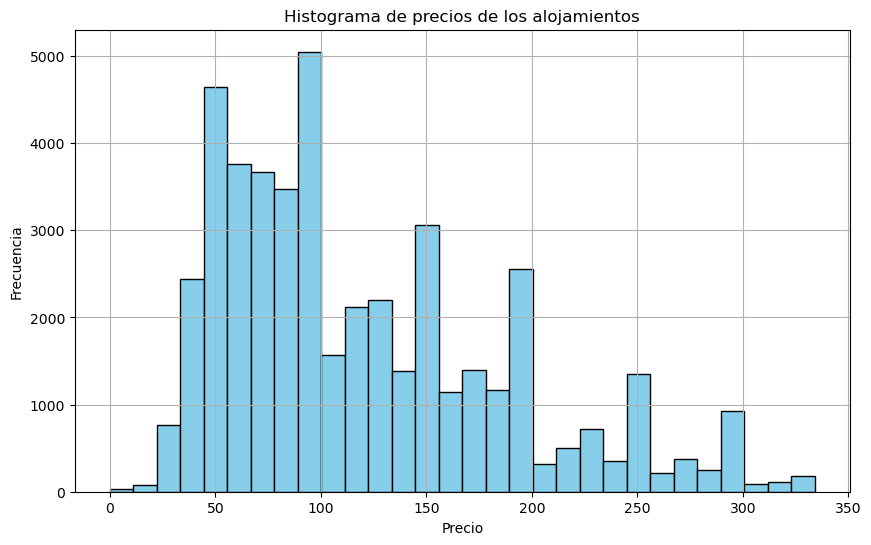

Precio mínimo: 0.0
Precio máximo: 334.0
Precio promedio: 119.98251381876223

Media de precio por 'Neighbourhood group':
neighbourhood_group_Bronx             75.963762
neighbourhood_group_Brooklyn         102.095211
neighbourhood_group_Manhattan        131.427031
neighbourhood_group_Queens            87.389069
neighbourhood_group_Staten Island     87.321716
dtype: float64

Media de precio por tipo de habitación:
room_type_Entire home/apt    145.762236
room_type_Private room        77.882662
room_type_Shared room         58.168966
dtype: float64


In [24]:
import matplotlib.pyplot as plt

# Histograma de los precios de los alojamientos
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de los alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Precios mínimos, máximos y promedio
precio_minimo = airbnb_data['price'].min()
precio_maximo = airbnb_data['price'].max()
precio_promedio = airbnb_data['price'].mean()

print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)
print("Precio promedio:", precio_promedio)

# Media de precio por "Neighbourhood group" utilizando las columnas one-hot
neighbourhood_group_columns = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']
media_precio_por_neighbourhood = airbnb_data[neighbourhood_group_columns].multiply(airbnb_data['price'], axis=0).sum() / airbnb_data[neighbourhood_group_columns].sum()

print("\nMedia de precio por 'Neighbourhood group':")
print(media_precio_por_neighbourhood)

# Media de precio por tipo de habitación utilizando las columnas one-hot
room_type_columns = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
media_precio_por_room_type = airbnb_data[room_type_columns].multiply(airbnb_data['price'], axis=0).sum() / airbnb_data[room_type_columns].sum()

print("\nMedia de precio por tipo de habitación:")
print(media_precio_por_room_type)

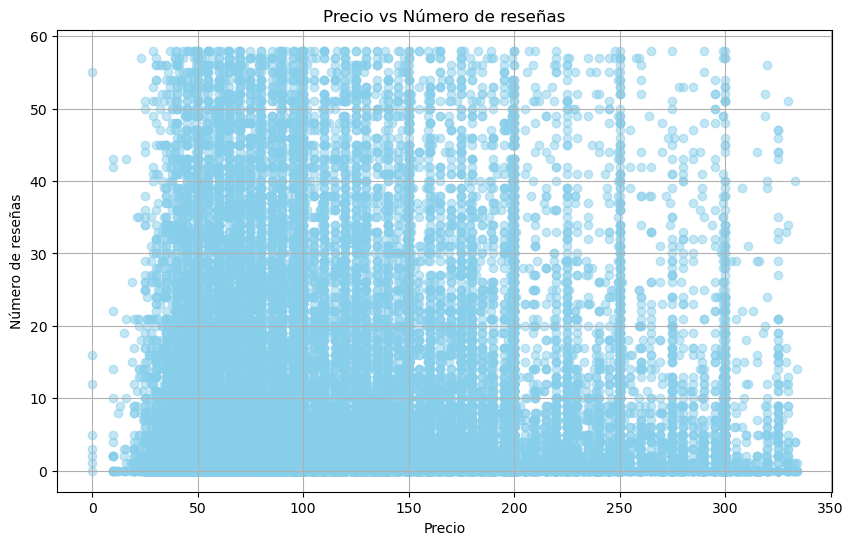

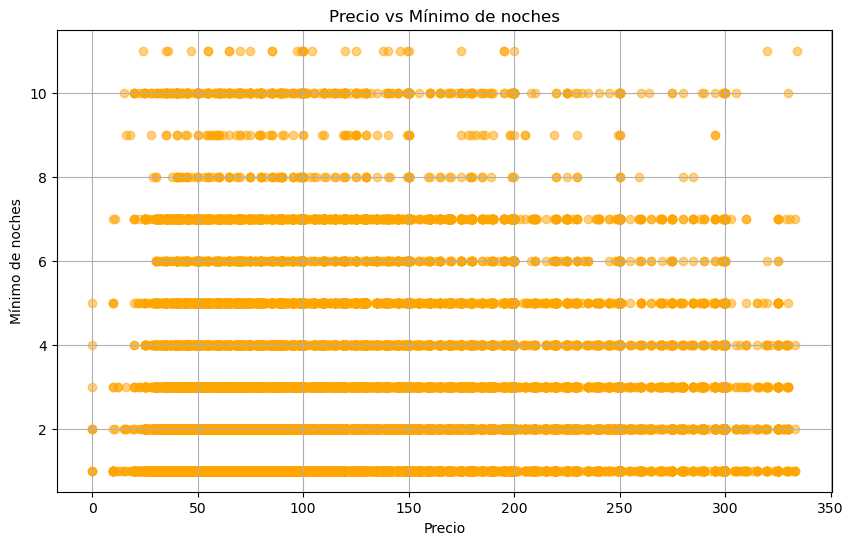

In [25]:
import matplotlib.pyplot as plt

# Scatter plot 1: Precio vs Número de reseñas
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_data['price'], airbnb_data['number_of_reviews'], alpha=0.5, color='skyblue')
plt.title('Precio vs Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de reseñas')
plt.grid(True)
plt.show()

# Scatter plot 2: Precio vs Mínimo de noches
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_data['price'], airbnb_data['minimum_nights'], alpha=0.5, color='orange')
plt.title('Precio vs Mínimo de noches')
plt.xlabel('Precio')
plt.ylabel('Mínimo de noches')
plt.grid(True)
plt.show()

In [26]:
import sys
!{sys.executable} -m pip install scikit-learn

Porcentaje de varianza explicada por las dos primeras componentes principales:
[0.3719117 0.3215414]
Loadings de las componentes principales:
[[ 0.48520155  0.61187793 -0.62464779]
 [ 0.87187157 -0.39285729  0.29240916]]


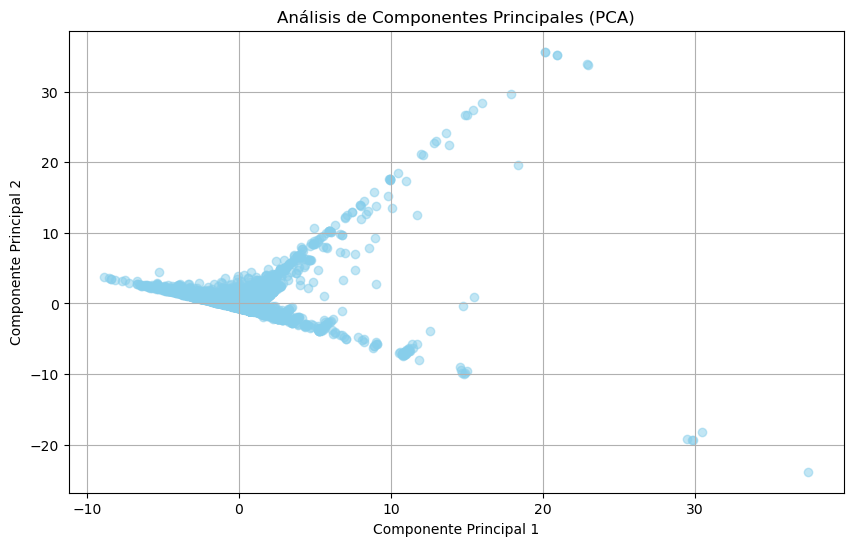

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

# Leer la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

# Eliminar valores duplicados
airbnb_data.drop_duplicates(inplace=True)

# Eliminar columnas sin información relevante
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

# Imputación de valores faltantes con la media
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# Transformar variables categóricas a numéricas utilizando one-hot encoding
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# Calcular la cantidad de oferentes por "Neighbourhood group"
offer_group = airbnb_data[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']].sum(axis=1)

# Agregar la columna 'offer_group' al DataFrame
airbnb_data['offer_group'] = offer_group

print(airbnb_data.head())

# Normalizar los datos
X_normalized = (airbnb_data[numeric_columns] - airbnb_data[numeric_columns].mean()) / airbnb_data[numeric_columns].std()

# Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

# Obtener el porcentaje de varianza explicada por las dos primeras componentes principales
varianza_explicada = pca.explained_variance_ratio_
print("Porcentaje de varianza explicada por las dos primeras componentes principales:")
print(varianza_explicada)

# Obtener los loadings de las componentes principales
loadings = pca.components_
print("Loadings de las componentes principales:")
print(loadings)

# Graficar los datos en dos dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5, color='skyblue')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [145]:
import pandas as pd
import numpy as np

# Leer la base de datos
airbnb_data = pd.read_csv("BaseAirbnbNY.csv")

# Eliminar valores duplicados
airbnb_data.drop_duplicates(inplace=True)

# Eliminar columnas sin información relevante
columns_to_drop = ['id', 'host_id','reviews_per_month','calculated_host_listings_count','availability_365']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

# Imputación de valores faltantes con la media
airbnb_data.fillna(airbnb_data.mean(numeric_only=True), inplace=True)

# Identificar y tratar outliers
# Calcular cuartiles
Q1 = airbnb_data.quantile(0.25, numeric_only=True)
Q3 = airbnb_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outlier_threshold = 1.5
outlier_mask = (airbnb_data.select_dtypes(include=np.number) < (Q1 - outlier_threshold * IQR)) | (airbnb_data.select_dtypes(include=np.number) > (Q3 + outlier_threshold * IQR))

airbnb_data[outlier_mask] = np.nan

# Transformar variables categóricas a numéricas utilizando one-hot encoding
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group', 'room_type'])

# Calcular la cantidad de oferentes por "Neighbourhood group"
offer_group = airbnb_data[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']].sum(axis=1)

# Agregar la columna 'offer_group' al DataFrame
airbnb_data['offer_group'] = offer_group

print(airbnb_data.head())

                                               name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237  149.0             1.0   
1       Midtown  40.75362  -73.98377  225.0             1.0   
2        Harlem  40.80902  -73.94190  150.0             3.0   
3  Clinton Hill  40.68514  -73.95976   89.0             1.0   
4   East Harlem  40.79851  -73.94399   80.0            10.0   

   number_of_reviews last_review  neighbourhood_group_Bronx  \
0                9.0  2018-10-19                      False   
1               45.0  2019-05-21                      False   
2                0.0   

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Columnas a dropear
columns_to_drop = ['name','host_name','neighbourhood','last_review']
airbnb_data.drop(columns=columns_to_drop, inplace=True)
# Establecer la variable dependiente `y` como `price`
# Las variables independientes serán las columnas restantes en `airbnb_data`
x = np.array(airbnb_data.drop(columns=['price']))
y = np.array(airbnb_data['price'])

# Dividir la base de datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Agregar una columna de unos (1) a `X_train` y `X_test` para incluir el intercepto en la regresión
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Paso 3: Implementar una regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Veamos ahora los resultados

# Calculamos el R2
r2 = model.score(x, y)
print('Coeficiente de determinación:', r2)

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)

# Aplicamos .predict(), metemos los valores del regresor en el modelo estimado y obtenemos la correspondiente respuesta predicha.

y_pred = model.predict(x)
print('Respuesta predicha:\n', y_pred)


KeyError: "['name', 'host_name', 'neighbourhood', 'last_review'] not found in axis"